Title: Cameras, Eyes, and Color
Author: Thomas M. Breuel
Institution: UniKL

In [6]:

from IPython.core.display import Image
from pylab import *
def fig(s): return Image(filename="Figures-intro/"+s+".png")
def figs(*args,**kw):
    rs = kw.get("rows",1)
    cs = kw.get("cols",len(args))
    for i,f in enumerate(args):
        subplot(rs,cs,i+1)
        axis("off")
        imshow(imread("Figures-intro/"+f+".png"))
from scipy.ndimage import filters

# Color Images and Tristimulus Theory

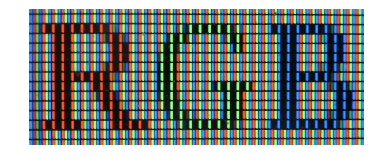

In [164]:
## LCD display
figs("rgb-color-display")

Images:

- each pixel on the screen has a red, green, and blue component
- to specify an image, we need to specify how much each pixel is activated (0 to 1)

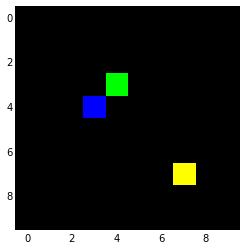

In [165]:
 # RGB images
image = zeros((10,10,3))
image[3,4,:] = (0.0,1.0,0.0)
image[4,3,:] = (0.0,0.0,1.0)
image[7,7,:] = (1.0,1.0,0.0)
imshow(image,interpolation='nearest')

People started color photography in the 19th century.
For this, they used black-and-white film plus color filters.

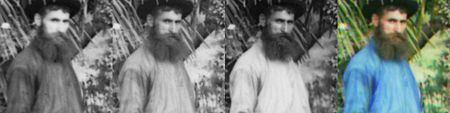

In [166]:
# color photograph with filters
# Sergey Prokudin-Gorsky
fig("color-channels-historical")

(color photography with b/w film)

- take black-and-white images through color filters (red, green, blue)
- develop black-and-white images
- use each filtered image to filter a light source
- add the three colors back together again


(trichromatic vision)

Questions:

- Why does this work? 
- Why red, green, and blue? 
- Do four or five filters work better?

Answers:

- Humans have three different color sensors
- scientific version of the above experiment (try different colors, filters) confirms this

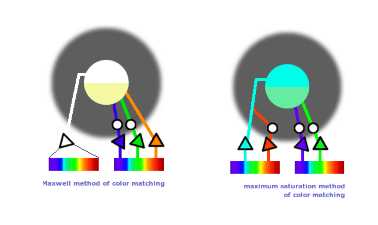

In [167]:
# Maxwell-Helmholtz color mixing
figs("maxwell-helmholtz")

(Tristimulus Theory)

The observation that all colors humans perceive can be decomposed into three _stimuli_ is called _tristimulus theory_ or _trichromacy_.

These experiments predicted the existence of three different visual cells in the human retina (later confirmed).

(Psychophysics)

Experiments like the Maxwell-Helmholtz experiment study human perception quantitatively.

These kinds of experiments are called _psychophysics_. Psychophysics forms the basis of many _compression algorithms_.

Common experiments involve:

- rank a sensation on a scale
- determine whether two stimuli are distinguishable
- determine whether a stimulus is perceptible
- judge whether two stimuli are equal
- judge which stimulus is stronger

(Definition of Color)

*Definition* Farbe ist diejenige Gesichtsempfindung eines dem Auge des Menschen strukturlos erscheinenden Teiles des Gesichtsfeldes, durch die sich dieser Teil bei einäugiger Beobachtung mit unbewegtem Auge von einem gleichzeitig gesehenen, ebenfalls strukturlosen angrenzenden Bezirk allein unterscheiden kann. (DIN 5033)

Note that this definition does not involve "wavelengths" or anything about physics.

Color is defined purely as a human perceptual phenomenon.

# Cameras

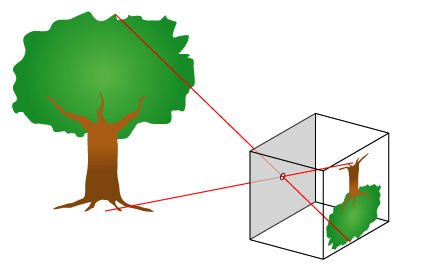

In [168]:
# camera model
fig("camera-model")

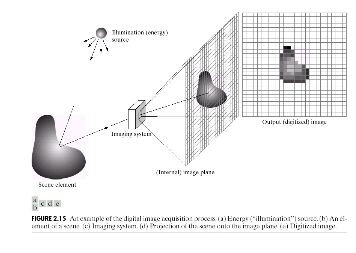

In [169]:
# camera model
figs("camera-model-2")

(image formation)

Image resulting from an illuminated, reflecting surface:

$$ \hbox{intensity-reaching-camera} = \hbox{intensity-of-light-source} \times \hbox{reflectance} $$

That is:

- the intensity of light reaching the camera is proportional to the intensity of the lightsource
- the factor of proportionality is called the _reflectance_ of the surface that the light is reflected from


(spatial dependency)

- how much light is reflected depends on the incident angle and the camera angle relative to the surface
- the simplest dependency is where the surface itself reflects uniformly in all directions (Lambertian)
- note that even for Lambertian surfaces, there is still a spatial dependency


(reflectance values)

Typical reflectance values are:

- black velvet: 0.01 (i.e., 1 percent)
- white wall paint: 0.80
- snow: 0.93

# Camera Sensors

(camera and human sensors)

Taking an image through three filters gives us RGB information everywhere. That only works for subjects that don't move.

Human eyes and cameras don't work that way. Instead of taking three full pictures, they take a single picture through multiple filters simultaneously.

Cameras usually work the same way. For cameras, the most commonly used pattern is the Bayer pattern.

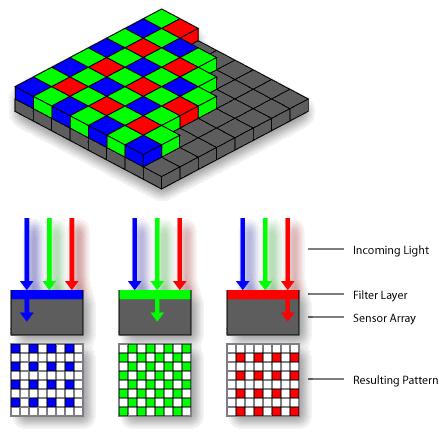

In [170]:
# Bayer Pattern
fig("bayer-pattern")

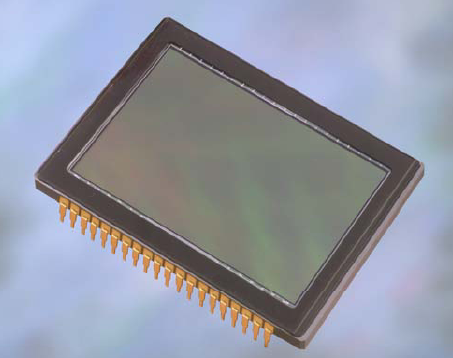

In [171]:
# CCD sensor
fig("ccd-sensor")

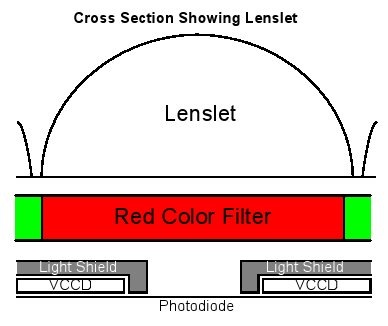

In [172]:
# CCD lenslet
fig("lenslet")

# The Human Eye

The human eye has a somewhat similar structure to a camera. It is composed of a _lens_ and a _retina_ ("color sensor").



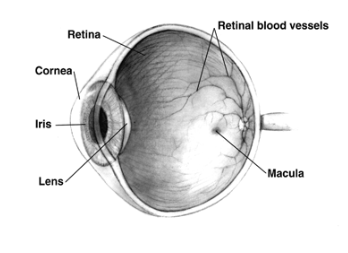

In [173]:
# the human eye
figs("eye2")

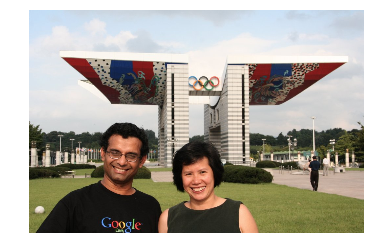

In [174]:
# what you think you see
figs("see1")

What the human eye records is actually very different from a camera.
Only the fovea is sharp and in color.



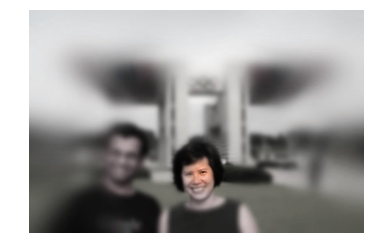

In [175]:
# what your eye records
figs("see2")

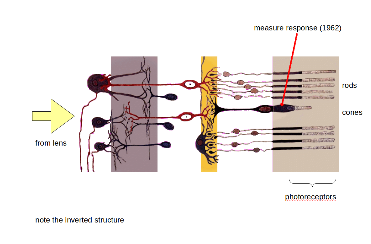

In [176]:
# structure of the human retina
figs("retina")

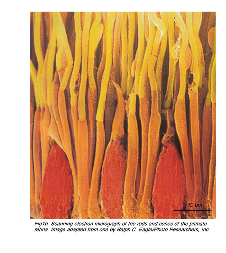

In [177]:
# human retina
figs("human-retina")

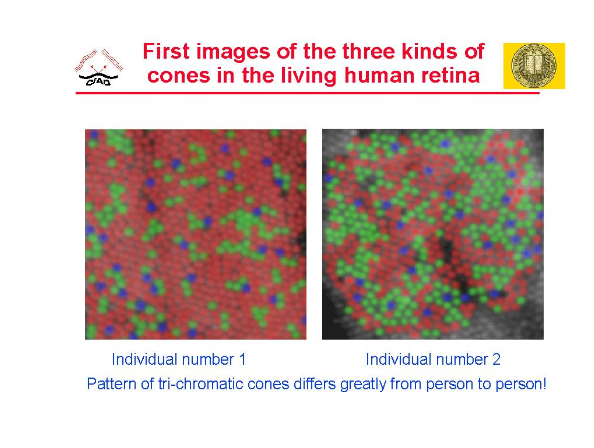

In [178]:
# human cones
figsize(10,20)
figs("human-cones")

(summary human eye)

- two kinds of photoreceptors (rods, cones)
- rods: night vision, ultra-sensitive
- cones: daylight vision, three kinds, color
- the eye has a simple lens
- sensing in the human eye is variable resolution
- color is perceived only near the center
- a complete scene is assembled only by the brain

# Spectra

We talked about color as a _perceptual phenomenon_.

How does color relate to spectra and wavelengths?

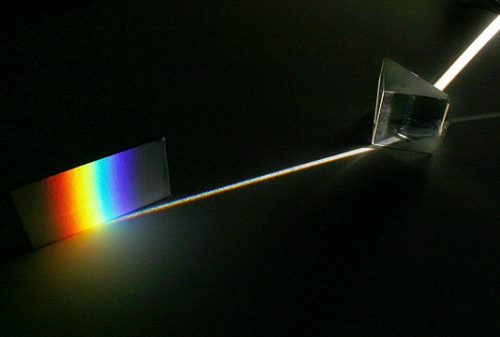

In [179]:
## Prism
fig("prism")

Light is part of the electromagnetic spectrum. The visible part of the EM spectrum is between ultraviolet and infrared.
The spectrum is indexed by the _wavelength_ or _frequency_ of light.



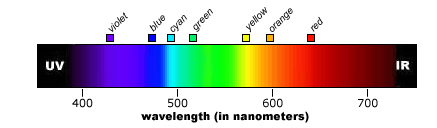

In [180]:
# Electromagnetic Spectrum
fig("spectrum")

Are all "pure" colors represented in the spectrum?

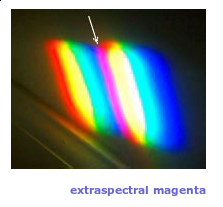

In [181]:
# Purple
fig("newton-purple")



Some pure colors do not exist in the spectrum, namely purple or magenta.
Overlapping the red and the blue ends of the spectrum (using two prisms) generates a new color.

# Spectral Sensitivities

(Spectra and Color Perception)

We know:

- light is composed of many different wavelengths
- humans (and cameras) have only three kinds of photo receptors
- each of these receptors gives us a single black-and-white image

Question:

- how do we see color?

In a _spectrum_, we plot for each wavelength how much of light of that wavelength is present.
In physics, we actually measure how much energy there is contained per unit area and wavelength interval.



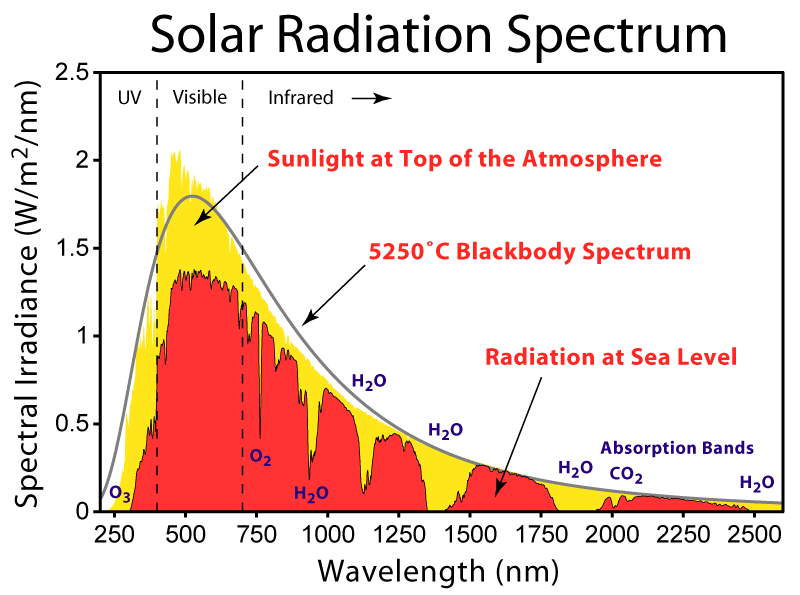

In [182]:
# Spectrum
fig("solar-spectrum")

The receptors in the human eye have different sensitivities at different wavelengths.
At IR wavelengths, they have no sensitivity = zero sensitivity.
At some wavelength, they have _peak sensitivity_ = sensitivity of 1.0.

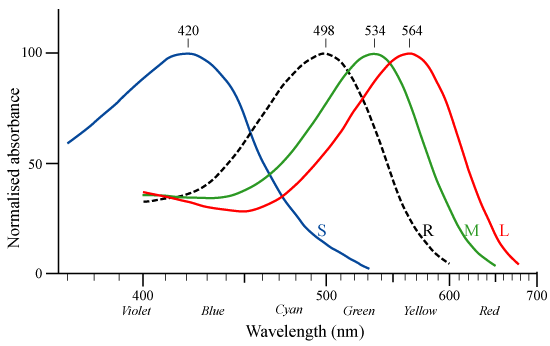

In [183]:
# Spectral Sensitivities
fig("sensitivity-curves")

(Receptor Response)

To get the response of a receptor to incoming light...

- for each wavelength, multiply the sensitivity $S(\lambda)$ at that wavelength -
- with the amount of incoming light $I(\lambda)$
- sum this over all wavelengths

$$ R = \hbox{const} \cdot \int_{300\hbox{nm}}^{700\hbox{nm}} S(\lambda) \cdot I(\lambda) d\lambda $$

(discretized spectra)

If we approximate the integral with a sum:

$$ R = \hbox{const} \cdot \sum_{\lambda=300}^{700} S(\lambda) \cdot I(\lambda) $$

If we treat $S$ and $I$ as 400-dimensional vectors, we can also write this just as a dot product:

$$ R = \hbox{const} \cdot \vec{S} \cdot \vec{I} $$

Let's do this as an actual calculation. This is also a good review of simple linear algebra.

# Simulated Sensitivities

Let's represent these spectra by representing the amount of light within each band of 1 nm.
This is an approximation to the continuous spectra found in nature.

Here, we're just using Gaussians to approximate the spectral response curves of the photo receptors;
of course, this isn't very realistic. Think of it as some "alien eye".


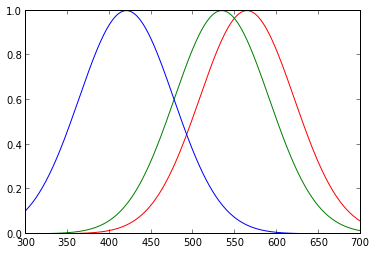

In [184]:
def g(s,c): return exp(-((s-c)/80.0)**2)
wavelengths = arange(300,700)
figsize(6,4)
eR = g(wavelengths,564); plot(wavelengths,eR,color='r')
eG = g(wavelengths,534); plot(wavelengths,eG,color='g')
eB = g(wavelengths,420); plot(wavelengths,eB,color='b')
l = wavelengths
#:h:1.5

Note that a spectrum and a spectral sensitivity curve is now a 400-dimensional vector.
You can think of the distribution of light intensities by wavelengths (i.e., spectra) as very high dimensional vectors like this.

## "RGB" Values from Light

Let's generate some (arbitrary) spectrum for a mostly reddish light source.



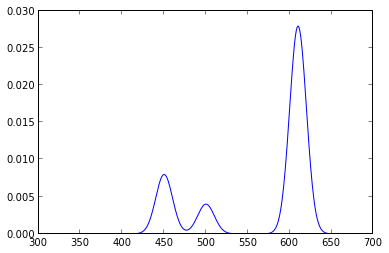

In [185]:
light = zeros(len(l))
light[150] = 0.2; light[200] = 0.1; light[310] = 0.7
light = filters.gaussian_filter(light,10.0,mode='constant')
plot(l,light)

We now obtain the response of each of the RGB sensors by multiplying, at each wavelength, the sensitivity of the sensor at that wavelength with the amount of light actually present at that wavelength, and sum it all up.

This can be written concisely as a dot product.


In [186]:
rgb = (dot(eR,light),dot(eG,light),dot(eB,light))
print rgb

(0.58067310677164286, 0.4375692991745056, 0.21208597770753429)


We can put together these three dot products into a matrix multiplication.

The "eye sensitivity matrix" maps the high-dimensional space of spectra into the low dimensional space of RGB values.



In [187]:
esm = array([eR,eG,eB])
print esm.shape
print dot(esm,light)



(3, 400)
[ 0.58067311  0.4375693   0.21208598]


Note that we properly talk about RGB values only when talking about images and monitors.

The actual stimulus values exist in a different space and are often called XYZ values.

## RGB Values from Reflected Light

In the real world, most light is reflected from surfaces. What happens with spectra is similar to what happens with eye sensitivity curves:

- the surface reflectance is multiplied element-wise with the incoming light spectrum
- the resulting product is then multiplied with the spectral sensitivities to get the RGB values

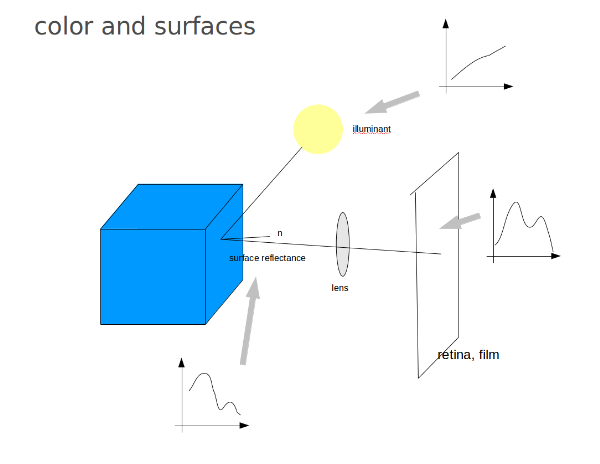

In [188]:
## surface colors and perception
#:h:2.5
figsize(10,8)
figs("reflected-light")

Let's start by constructing an illuminant for a sort-of wide spectrum illuminant (don't worry about the details of this construction, just look at the final curve).



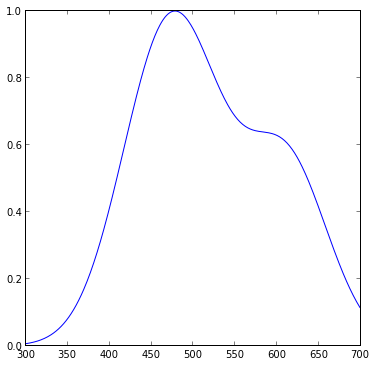

In [189]:
# constructing an illuminant
#:h:1.5
illum = zeros(len(l))
illum[150] = 0.3; illum[200] = 0.3; illum[310] = 0.3
illum = filters.gaussian_filter(illum,50.0,mode='constant')
illum /= amax(illum)
figsize(6,6)
plot(l,illum)

Next, let's construct a surface reflectance for a reddish object (again, these values are just arbitrary).



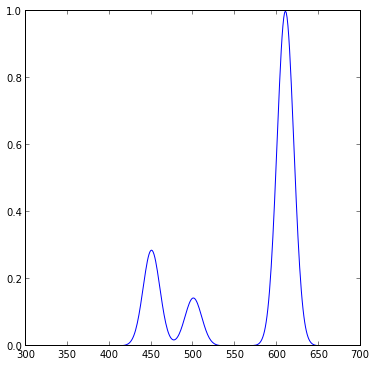

In [190]:
# constructing a surface reflectance
refl = zeros(len(l))
refl[150] = 0.2; refl[200] = 0.1; refl[310] = 0.7
refl = filters.gaussian_filter(refl,10.0,mode='constant')
refl /= amax(refl)
plot(l,refl)

[ 13.54537488  11.23021505   6.76528753]


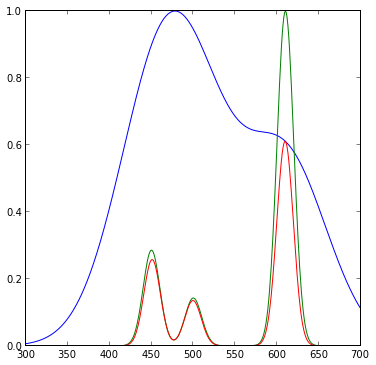

In [191]:
# the reflected spectrum and RGB values
plot(l,illum)
plot(l,refl)
# the reflected spectrum
plot(l,illum*refl)
# the photoreceptor activations
print dot(esm,illum*refl)

## Metameric Colors

Note:

- light in the world exists in an "infinite dimensional color space" of spectra
- we represent that above as a 400 dimensional vector (intensity at each nm of wavelength)
- human color perception works in a three dimensional vector space
- the infinite dimensional space is projected onto the three dimensional space based on spectral sensitivities of cones

There are many 400-dimensional vectors that project onto the same RGB values.

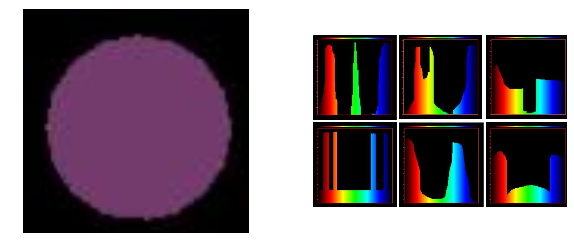

In [192]:
# metameric spectra
figsize(10,4)
figs("metameric-patch","metamerism")

rgb value [ 0.17314586  0.31089347  1.0497769 ]


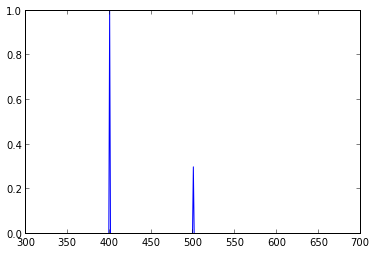

In [193]:
# a color
#:h:1
figsize(6,4)
color1 = zeros(len(l))
color1[100] = 1.0
color1[200] = 0.3
rgb1 = dot(esm,color1)
print "rgb value",rgb1
plot(l,color1)

rgb1 [ 0.17314586  0.31089347  1.0497769 ]
rgb2 [ 0.17314586  0.31089347  1.0497769 ]


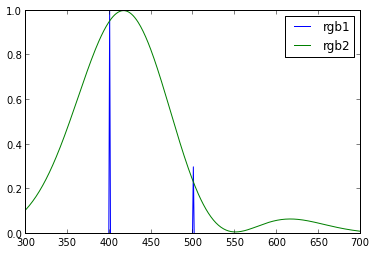

In [194]:
# constructing a metameric color for color1
color2 = dot(pinv(esm),rgb1)
rgb2 = dot(esm,color2)
# note that we can construct others; pinv is convenient
print "rgb1",rgb1
print "rgb2",rgb2
plot(l,color1/amax(color1),label="rgb1")
plot(l,color2/amax(color2),label="rgb2")
legend()

(metameric colors)

The example shows that we can have two completely different spectra that project to the same stimulus values.

Note that `rgb1` is composed of narrow-band signals (e.g., spectral lines; example: sodium lamps), while `rgb2` is broadband (example: candle, fire).

## Color Spaces

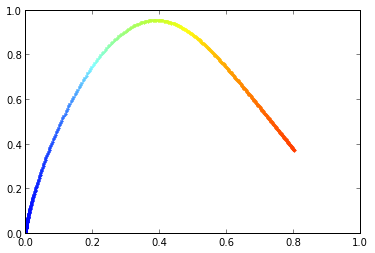

In [195]:
# spectrally pure colors
#:h:1.5
samples = []; colors = []
for i in range(len(l)):
    s = zeros(len(l))
    s[i] = 1.0
    xyz = dot(esm,s)
    samples.append([xyz[0]/sum(xyz),xyz[1]/sum(xyz)])
    colors.append(xyz/amax(xyz))
ylim((0,1)); xlim((0,1))
for i,c in enumerate(colors): plot(samples[i][0],samples[i][1]/0.53,'.',c=c)

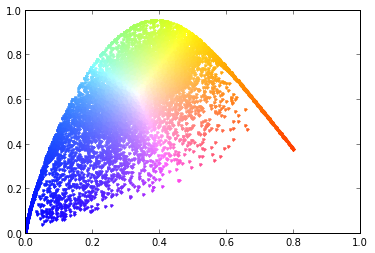

In [196]:
# the space of possible colors
samples = []; colors=[]
for i in range(10000):
    s = 1.0*(rand(len(l))>0.99)
    xyz = dot(esm,s)
    if sum(xyz)<1e-6: continue
    samples.append([xyz[0]/sum(xyz),xyz[1]/sum(xyz)])
    colors.append(xyz/amax(xyz))
ylim((0,1)); xlim((0,1))
for i,c in enumerate(colors): plot(samples[i][0],samples[i][1]/0.53,'.',c=c)

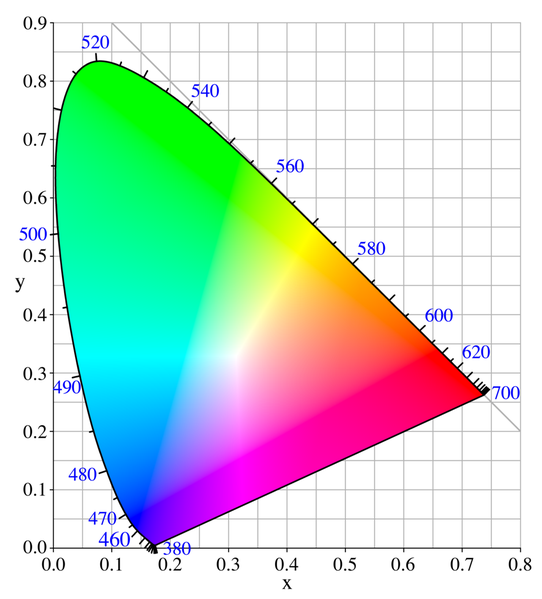

In [197]:
# The CIE XYZ Color Space
#:h:2.5
fig("cie-colorspace")

## RGB Monitors

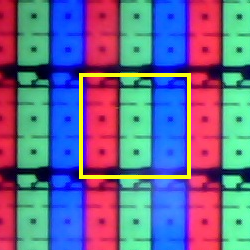

In [198]:
# RGB Pixel
fig("rgb-pixel-lcd")

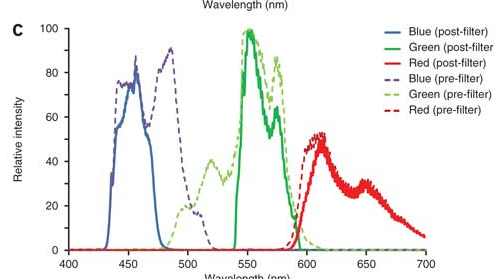

In [199]:
# LCD Spectra
fig("lcd-spectra")



Let's construct a coarse approximation to this numerically.

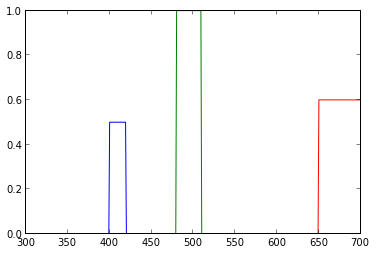

In [200]:
# Simple Monitor Model
#:h:1.5
lB = zeros(len(l)); lB[100:120] = 0.5
lG = zeros(len(l)); lG[180:210] = 1.0
lR = zeros(len(l)); lR[350:400] = 0.6
plot(l,lB,color='b')
plot(l,lG,color='g')
plot(l,lR,color='r')
lcd = array([lR,lG,lB]).T

Let's now plot the original color space and overlay the space of colors realizable by the monitor.


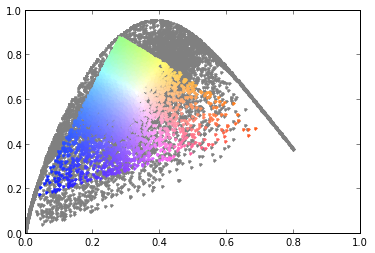

In [201]:
# Monitor Gamut vs Color Space
lsamples = []; lcolors = []
for i in range(10000):
    p = rand(3)
    s = dot(lcd,p)
    rgb = dot(esm,s)
    lsamples.append([rgb[0]/sum(rgb),rgb[1]/sum(rgb)])
    lcolors.append(rgb)
lsamples = array(lsamples)
ylim((0,1)); xlim((0,1))
for i,c in enumerate(colors): plot(samples[i][0],samples[i][1]/0.53,'.',c=(.5,.5,.5))
for i,c in enumerate(lcolors): plot(lsamples[i,0],lsamples[i,1]/0.53,'.',c=c/amax(c))

The monitor _gamut_ is a triangle while the color space is a weird roundish thing.

The reason the gamut is a triangle is because it is a _convex linear combination_ of the spectra of the three primary phosphors of the monitor.

The reason the color space itself is not a triangle is because it is the projection of a very high dimensional convex combination into two dimensional space.

Here is what the color space and monitor gamut look like in the more usual coordinates.



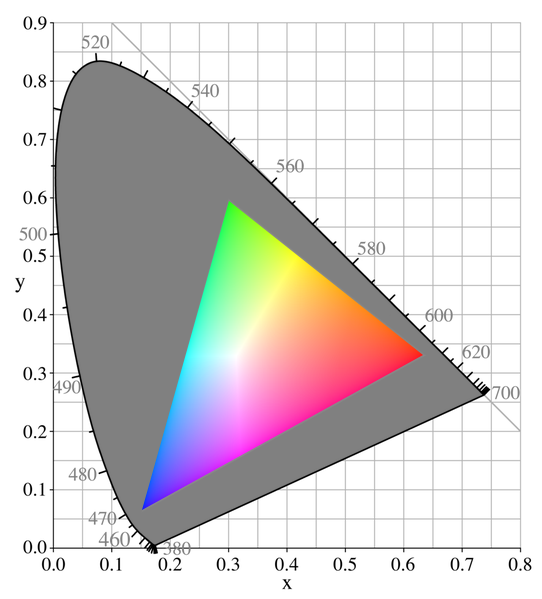

In [202]:
# CIE Color Space and Typical Gamut
#:h:2.5
fig("gamut")

When we display RGB images on a monitor, the following happens:

- we specify each color component as a value between 0 and 1, indicating completely off, completely on, or something in between
- this means each pixel being displayed has an RGB vector associated with it that exists in the space $[0,1]^3$
- this RGB value is mapped into the infinite dimensional spectral space via the LCD's emission spectra
- the LCD emission spectra are then projected back into a three dimensional space based on the cone sensitivities
- the three values that are being perceived are often called XYZ values or _tristimulus values_
- usually, people are sloppy and use RGB when they mean XYZ

(Gamut)

- the values output by the monitor in RGB space are a convex combination once we project into $R/(R+G+B)$ and $G/(R+G+B)$
- this shows up as a triangle in RGB space
- the monitor-to-spectrum and spectrum-to-tristimulus transformations are both linear
- the convex combination of RGB values therefore turns into a convex combination in XYZ
- the _gamut_ of achievable color combinations in XYZ space is therefore also a triangle
- the triangle must be contained within the entire space of possible color
- the entire space of possible colors is not a triangle
- therefore, with three primary pixel colors, the color gamut of a monitor does not fill the whole color space

# Color Constancy

Above, we analyzed the relationship between wavelengths, spectra, and color perception.

It turns out that that is far from sufficient for characterizing color perception. Color perception also depends on _context_.

There are a number of illusions illustrating this. Let's look at two of them.

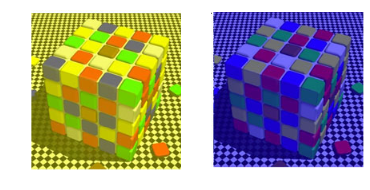

In [3]:
# Color Constancy
figs("cc1","cc2")

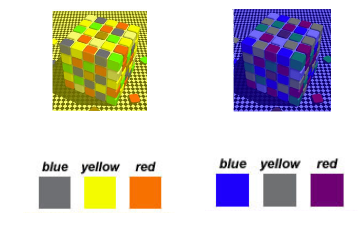

In [8]:
# Color Constancy Revealed
figs("cc1","cc2","cc3","cc4",rows=2,cols=2)

Mechanisms similar to color constancy also play a role in the perception of intensities.



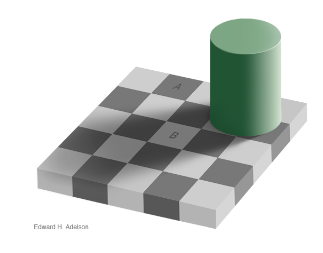

In [9]:
# Adelson Illusion
figs("aillusion")

(Mechanisms for Color Constancy)

How do these mechanisms works? It's not completely understood, but you can simulate color constancy by...

- a "grayworld" assumption
- assumptions about the color of specular highlights
- knowledge of the color of specific objects in scenes (e.g., skin tones)
- Retinex theory and similar theories based on edges and color edges

# Summary

(Summary)

- light in the real world is described by a continuous spectrum
- eyes have three color sensors (cones), each with spectral sensitivities
- the XYZ values we see result from the interaction between sensitivities and light spectra
- this is a mapping from a high dimensional vector space into a three dimensional vector space
- many different spectra give rise to the same XYZ colors ("metamerism")
- monitors have three additive color components, each with spectral emissivities
- for display, these components are RGB values

(Summary 2)

- color is not defined in terms of spectrum, but in terms of perception
- the measurement of perception is called _psychophysics_
- all possible colors we can see form a 2D color space
- the third dimension of the color space is intensity
- part of the color space corresponds to spectrally pure colors ("one wavelength")
- other parts of the color space can only be reached by mixing colors ("line of purples")
- color displays never cover the entire color space; they have a limited _gamut_

(Summary 3)

- color perception is based not just on wavelengths and receptor activations, but also on context
- context can be modeled using a variety of computational mechanisms